### ライブラリインポート

In [18]:
import polars as pl
import numpy as np

import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

from scipy.stats import binom

import pymc as pm
import arviz as az

## 8.1 例題: 種子の生存確率(個体差なし)

#### データ(観測値)準備

In [5]:
X = pl.read_parquet("../data/ch 08/data.parquet").to_pandas()
X.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
y,4.0,3.0,4.0,5.0,5.0,2.0,3.0,1.0,4.0,0.0,1.0,5.0,5.0,6.0,5.0,4.0,4.0,5.0,3.0,4.0


c:\Users\treme\.conda\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\treme\.conda\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\treme\.conda\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: ylabel='Count'>

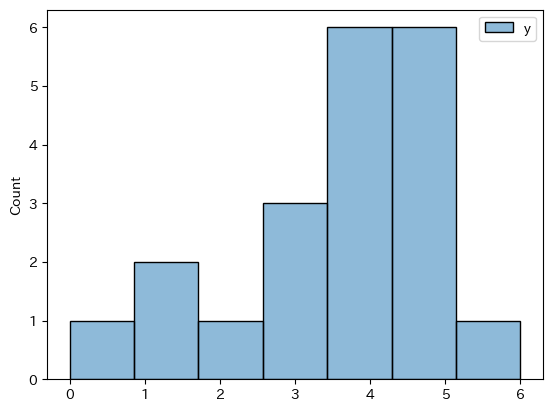

In [17]:
sns.histplot(data = X, bins = int(X["y"].max() - X["y"].min())+1)
plt.title("図8.1変更 (B)例題の架空データのヒストグラム")

## 8.2 ふらふら試行錯誤による最尤推定

## 8.3 MCMCアルゴリズムのひとつ: メトロポリス法

### 8.3.1 メトロポリス法でサンプリングしてみる

#### 確率モデル定義

In [28]:
model1 = pm.Model()

number_of_seeds = 8

with model1:
    p = pm.Uniform(name = "p")

    X_obs = pm.Binomial(name = "X_obs", n = number_of_seeds, p = p, observed = X["y"].to_numpy())

#### 確率モデル構造可視化

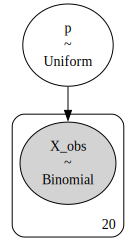

In [29]:
g = pm.model_to_graphviz(model1)
display(g)

#### サンプリング

In [30]:
with model1:
    idata1 = pm.sample(random_seed = 42)# , chains = 2, tune = 5, draws = 5

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 24 seconds.


#### plot_trace 関数呼び出し

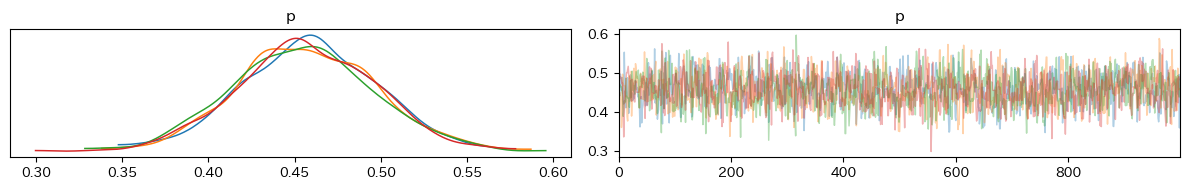

In [31]:
axes = az.plot_trace(idata1, compact = False)
plt.tight_layout()

#### plot_posteror関数呼び出し

Text(0.5, 1.0, '図8.7に対応 ベイズ推論結果')

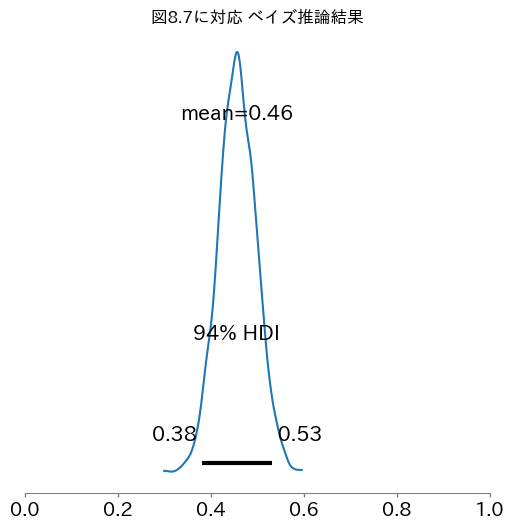

In [32]:
plt.rcParams['figure.figsize'] = (6, 6)
ax = az.plot_posterior(idata1)
ax.set_xlim(0, 1)
ax.set_title('図8.7に対応 ベイズ推論結果')

#### summary関数呼び出し

In [27]:
summary1 = az.summary(idata1)
display(summary1)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.446,0.049,0.365,0.527,0.018,0.013,7.0,7.0,1.34


### 8.3.2 マルコフ連鎖の定常分布

### 8.3.3 この定常分布は何をあらわす分布なのか?

## 8.4 MCMCサンプリングとベイズ統計モデル

## 8.5 補足説明

### 8.5.1 メトロポリス法と定常分布の関係

### 8.5.2 ベイズの定理

## この章のまとめと参考文献
* 最尤推定法は尤度最大になるパラメータを探索する最適化である.
* これに対して,MCMCアルゴリズムは定常分布からのランダムサンプリングが目的である.
* いまあつかっている統計モデルがベイズ統計モデルであるとすると,定常分布は事後文であるとみなせる.

* 伊庭「計算統計Ⅱ--マルコフ連鎖モンテカルロ法とその周辺」
* 伊庭「ベイズ統計と統計物理」